In [31]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

In [32]:
nu = 5e-3
a = 1e-3
g = 9.8
h = 1
DeltaT = 1
Tm = 300
beta = 1e-3

Ra = beta*h**3*g*(DeltaT)/nu/a
Ra

1960.0000000000002

In [47]:
A = pd.read_csv('umbral_RB4.csv',header=None,decimal=',')

data = A.apply(pd.to_numeric, errors='coerce')
Ra,Ux,Uy,Uz,U,Uxmax,Uymin,Uymax,Uymin = data.to_numpy().T
r = Ra**.5
nmuestras = 4
p1 = np.polyfit(r[:nmuestras],Uymax[:nmuestras]**2,1)
Uy_function = np.poly1d(p1)
r_s = np.linspace(r.min()-1,r.max())
Ra_s = r_s **2


n_critico =  (Uy_function(r_s)**2).argmin()
r_critico = r_s[n_critico]
Ra_critico = Ra_s[n_critico]
epsilon = (r_s - r_critico)/r_critico
epsilon_i = (r - r_critico)/r_critico

/tmp/ipykernel_398197/3586535630.py:4: RuntimeWarning: invalid value encountered in sqrt
  ax2.plot(epsilon,Uy_function(r_s)**.5)


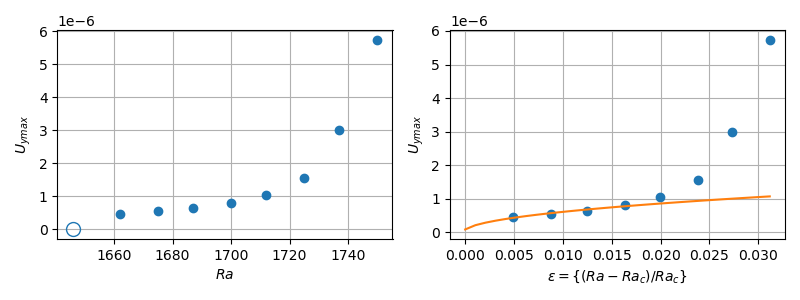

In [48]:
fig,ax = plt.subplots(1,2,figsize=(8,3))
ax1,ax2 = ax
ax2.plot(epsilon_i,Uymax,'o')
ax2.plot(epsilon,Uy_function(r_s)**.5)
ax2.grid()
ax2.set_xlabel(r'$\varepsilon = \left\{(Ra - Ra_c)/Ra_c\right\}$')
ax2.set_ylabel(r'$U_{ymax}$')

points1, = ax1.plot(Ra,Uymax,'o')
ax1.plot(Ra_critico,0,'o',markersize=10,fillstyle='none',color=points1.get_color())
ax1.set_xlabel(r'$Ra$')
ax1.set_ylabel(r'$U_{ymax}$')
ax1.grid()
fig.tight_layout()

In [50]:
md(f'El valor crítico del número de Rayleigh resulta $Ra_c$ = {Ra_critico:.2f}')

El valor crítico del número de Rayleigh resulta $Ra_c$ = 1645.80

In [51]:
error = abs((Ra_critico-1708)/(1708)*100)
md(f'El error relativo en la determinación del umbral es $e$ = {error:.2f}%')

El error relativo en la determinación del umbral es $e$ = 3.64%